# In this notebook I'll analyse the flight booking dataset. Using two different classifications on the | dataset, I'll predict the price of the flight

## About this dataset

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the Clean_Dataset.csv.

## Features

The following are explanations of the different features in the Clean_Dataset:

* Airline: This column contains the name of the airline company, and is a categorical feature with six different airlines.

* Flight: This categorical feature contains information about the plane's flight code.

* Source City: This categorical feature contains the name of the city where the flight takes off from, with six unique cities.

* Departure Time: This categorical feature is derived from grouping time periods into bins, and contains six unique time labels.

* Stops: This categorical feature contains three distinct values that indicate the number of stops between the source and destination cities.

* Arrival Time: This categorical feature is derived from grouping time intervals into bins, and contains six distinct time labels that provide information on the arrival time. 

* Destination City: This categorical feature contains the name of the city where the flight will land, with six unique cities.

* Class: This categorical feature contains information about the seat class, with two distinct values: Business and Economy.

* Duration: This continuous feature displays the overall travel time between cities in hours.

* Days Left: This derived feature is calculated by subtracting the booking date from the trip date.

* Price: This is the target variable that stores information about the ticket price.

## hypothesis

Based on the diagram of the scikit-learn algorithm cheat-sheet (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), it appears that the SGD Regressor classifier would provide the best results for predicting flight prices given the available features.

Additionally, I have also chosen to consider the Decision Tree classifier as a second option, despite not being included in the cheat-sheet from scikit-learn. This is because we have previously used the Decision Tree algorithm in the practice notebook (Avocado_opdracht) to predict the price of avocados.

While I believe that the SGD Regressor would likely produce more accurate predictions, it is worth noting that the Clean_Dataset used for predicting flight prices is almost twice as large as the avocado dataset used in the practice notebook. 

## 1. Data understanding

In [23]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [24]:
# Load the data in
df = pd.read_csv('Clean_Dataset.csv')

In [25]:
# Data shape
df.shape

(300153, 12)

In [26]:
# Preview of the first 10 rows of the data
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [27]:
# Drop unnecessary columns
df = df.drop('Unnamed: 0', axis=1)
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [28]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


<b> I learned in the bootcamp that machine learning algorithms prefer to work with numerical data types. So here I need to convert the Dtype object to numeric e.g. class to numeric Dtype (Business: 0 Economy: 1). I'll do that later in the data preparation section.

In [29]:
# Let's see what we have in the dataset; the variables with mean and standard deviation
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [30]:
df.corr().T

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


<b> Based on this table, I can say that there is almost no correlation between these features.

## 2. Exploratory Data Analysis

In [31]:
# count the flight of different airlines
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

The most flights were booked through Indigo airline

In [32]:
# Count the classes of different airlines
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

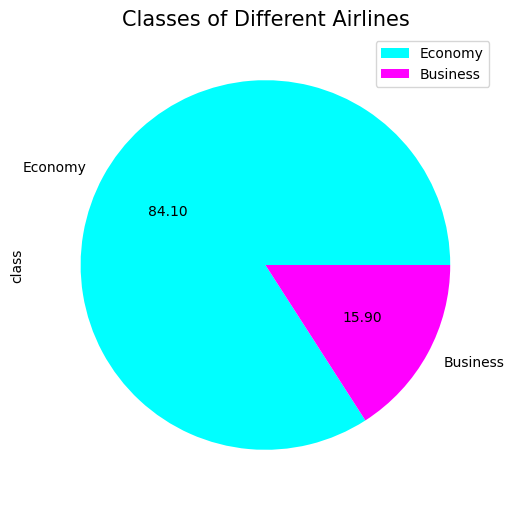

In [33]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

<b> Economy class are more common for most of the airlines

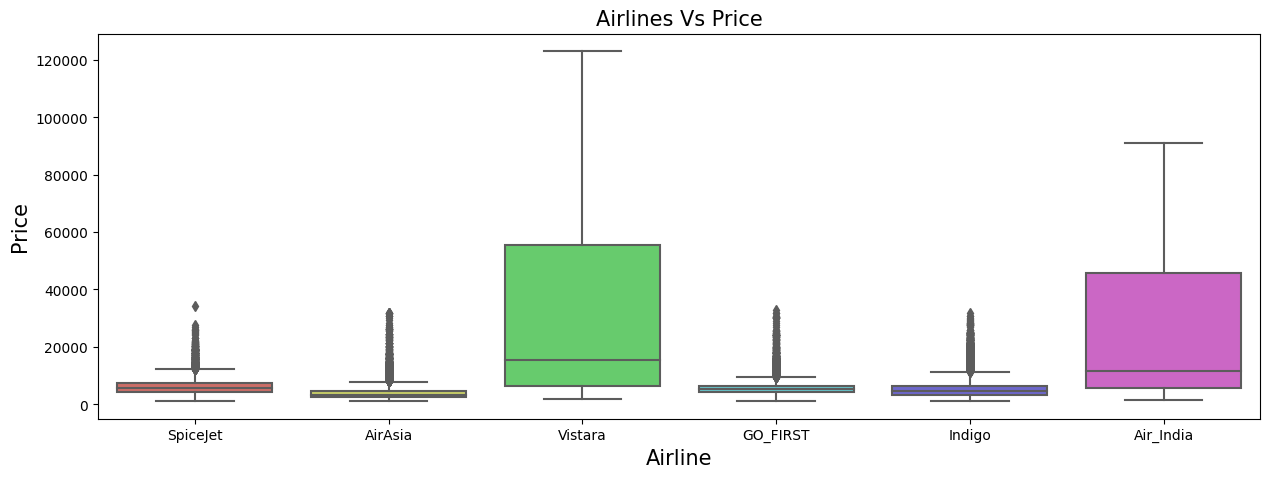

In [34]:
# plot the price for each airline
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<b>

- Vistara has the maximum price range, after that comes Air_India. 
- The other airlines has almost the same price range.

</b>

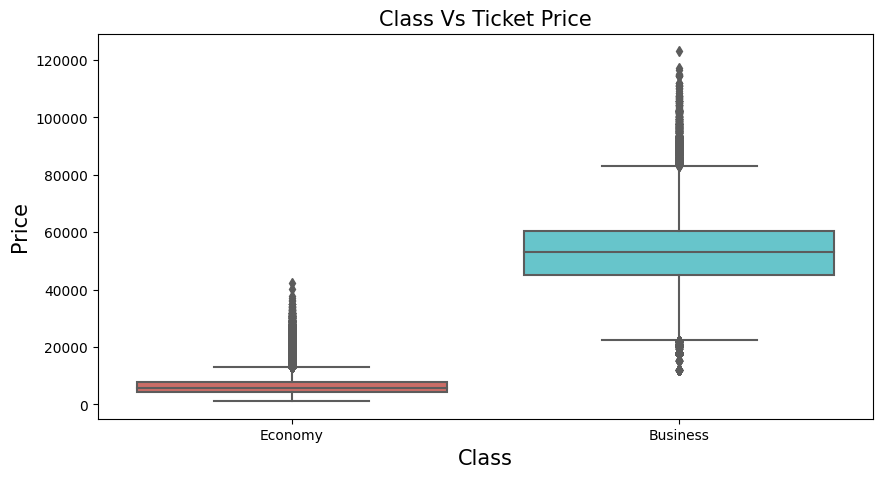

In [35]:
# plot prices in relation to the classes
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<b> It is clear that the prices for Business Class are much more expensive than Economy

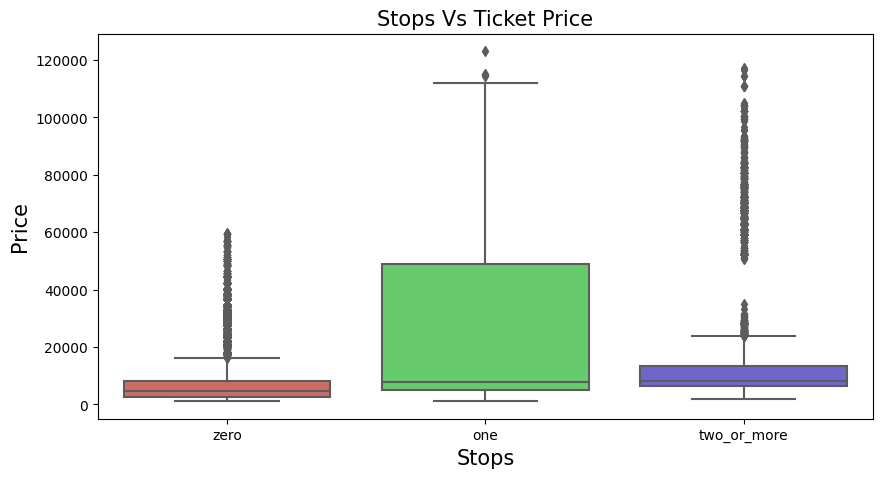

In [36]:
# Also for the stops
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<b> Surprising that one-stop airfares are the most expensive while zero-stop airfares are much cheaper.

## 3. Data preparation

In [37]:
# Creating a Back up File
df_bk=df.copy()

In [38]:
# Test 1 (null values)
null_vallues = (df == 0).sum()

null_vallues

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [39]:
# Test 2 (nan values)
nan_values = df.isna().sum()

nan_values

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<b> The whole dataset is filled. That's fine.

I need to replace categorical data with numerical data. For some features it is important to use ordinal. So I will use LabelEncoder for all features with Dtype object.

In [40]:
# Coverting the labels into a numeric form using Label Encoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [41]:
# View the dataset
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


## 4.1 Modeling & Validation (DecisionTreeRegressor)

In [42]:
# split data to 80% train data & 20% test data randomly (to build & evaluate Model)
X = df.drop('price', axis=1)
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
# preview of the first 7 rows of train data
X_train.head(7)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
148417,1,714,4,0,0,4,1,1,19.42,6
36879,3,110,2,0,1,5,1,1,7.00,13
274531,1,845,4,0,0,0,1,0,21.17,44
166397,5,1520,3,5,0,1,0,1,10.25,11
272722,5,1456,4,5,0,5,1,0,26.50,5
183550,5,1481,1,0,0,2,2,1,5.58,24
47422,5,1521,5,4,0,0,2,1,4.92,24


In [44]:
# preview of the first 7 rows of test data
X_test.head(7)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
27131,1,748,2,4,0,1,4,1,19.75,40
266857,5,1442,4,4,0,5,5,0,9.83,42
141228,5,1454,4,4,0,5,0,1,10.50,41
288329,5,1479,1,5,0,4,2,0,14.50,14
97334,1,743,0,0,0,5,5,1,8.25,20
135931,0,1177,4,1,0,0,0,1,10.83,5
290630,5,1481,1,0,2,0,5,0,2.00,7


In [45]:
# build Model (DecisionTreeRegressor)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

The performance measure that I will use is R2. Because here I'm trying to predict a continuous numerical value. So I want to know how far the dots/points are from the line(model). This is how I find out how well my model is doing. So, the higher the R2, the closer the dots are to the line, so the better the model.

In [46]:
r2 = model.score(X_test, y_test)
print("R2-score: {}".format(r2))

R2-score: 0.9828565136586119


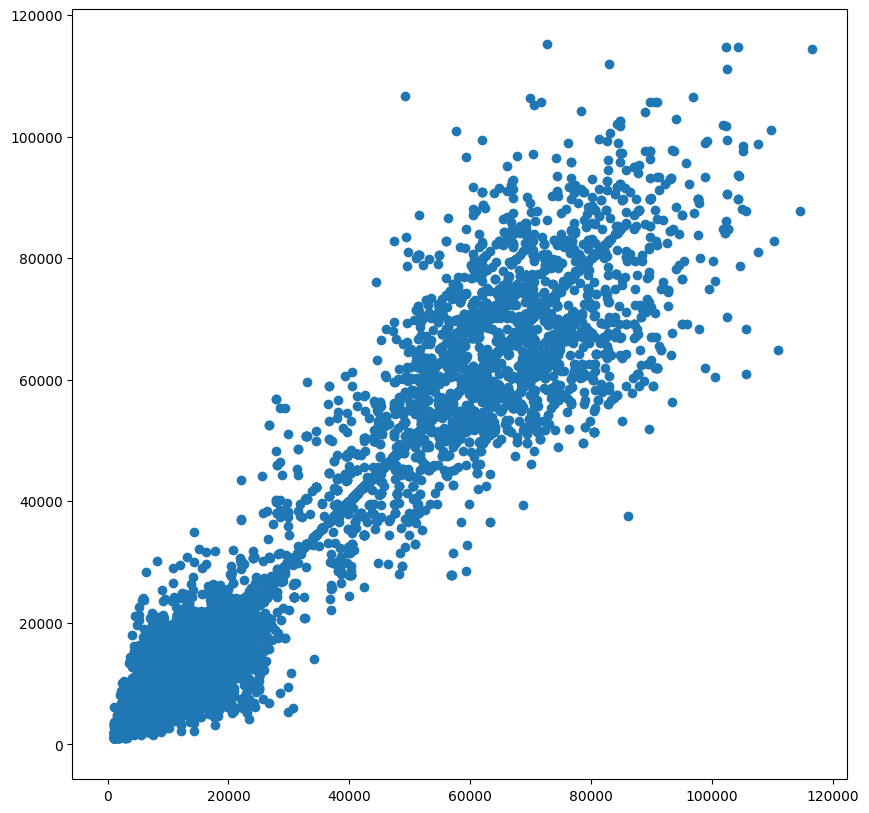

In [47]:
# Below, the performance of the Decision Tree model is visualized in a plot
plt.figure(figsize=(10,10))
plt.scatter(model.predict(X_test), y_test)
plt.plot([0,4], [0,4], '--k')

<b> There are some outliers (very distant dots) that I can see. But overall I think the results are pretty good. In my opinion, these outliers have a small effect, because the data set is very large.

Last week, I learned about the benefits of using cross-validation in machine learning. By using cross-validation, I can avoid both underfitting and overfitting of the model, and ensure that the data is being used efficiently.

In [48]:
# 7-fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=7, scoring='r2')

# print the R2-scores for each fold
print("R2-scores for each fold: {}".format(scores))

# calculate the mean of the R2-scores
mean_r2 = np.mean(scores)
print("mean of the R2-scores: {:.2f}".format(mean_r2))

R2-scores for each fold: [0.98217916 0.98184302 0.98281864 0.98293987 0.98209524 0.98272301
 0.98314986]
mean of the R2-scores: 0.98


<b>

* The fact that the R2-scores are consistently high across all folds indicates that the model is robust and not overfitting to any specific subset of the data. 

* Additionally, the high mean score suggests that the model is generalizing well to new data and is likely to perform well on unseen data.
</b>

In [49]:
param = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

grid_search = GridSearchCV(estimator = model, param_grid = param, cv = 7, n_jobs = 1)
grid_search.fit(X, y)

GridSearchCV(cv=7, estimator=DecisionTreeRegressor(random_state=42), n_jobs=1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

max_depth: This determines the maximum depth of the decision tree. A higher value can result in a more complex model that may overfit the training data, while a lower value can lead to underfitting. By testing different values in the range of 3 to 7, we can find the optimal depth that provides the best performance on the validation data.

min_samples_split: This specifies the minimum number of samples required to split an internal node. A lower value can result in a more complex tree that may overfit, while a higher value can prevent the tree from splitting and result in underfitting. By testing different values in the range of 2 to 10, we can find the optimal number of samples for splitting.

min_samples_leaf: This specifies the minimum number of samples required to be at a leaf node. A lower value can result in overfitting, while a higher value can prevent the tree from splitting and result in underfitting. By testing different values in the range of 1 to 4, we can find the optimal number of samples for leaf nodes.

In [50]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.5913146422426951


<b> 

I find it a bit confusing that after using Grid Search the results are much worse than before I used it. I searched the internet and what I can conclude is the following:

* Overfitting: It is possible that the model is over-optimized for the training set during the optimization process and therefore underperforms on new, unseen data.

* Insufficient range of hyperparameters: The selected set of hyperparameters in the grid search may not have enough flexibility to find the optimal combination that best fits the data.

## 4.2 Modeling & Validation (SGD Regressor)

In [51]:
# Create an instance of the SGDRegressor with default hyperparameters
sgd_model = SGDRegressor(random_state=42)

# Fit the model to the training data
sgd_model.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [52]:
# Calculate the R2 score
r2 = sgd_model.score(X_test, y_test)
print("R2-score: {}".format(r2))

R2-score: -1.4684470948749476e+18


In [53]:
# 7-fold cross validation
scores = cross_val_score(sgd_model, X_train, y_train, cv=3, scoring='r2')

# print the R2-scores for each fold
print("R2-scores for each fold: {}".format(scores))

# calculate the mean of the R2-scores
mean_r2 = np.mean(scores)
print("mean of the R2-scores: {:.2f}".format(mean_r2))

R2-scores for each fold: [-5.23279282e+16 -6.88035650e+18 -3.72452614e+18]
mean of the R2-scores: -3552403523264361984.00


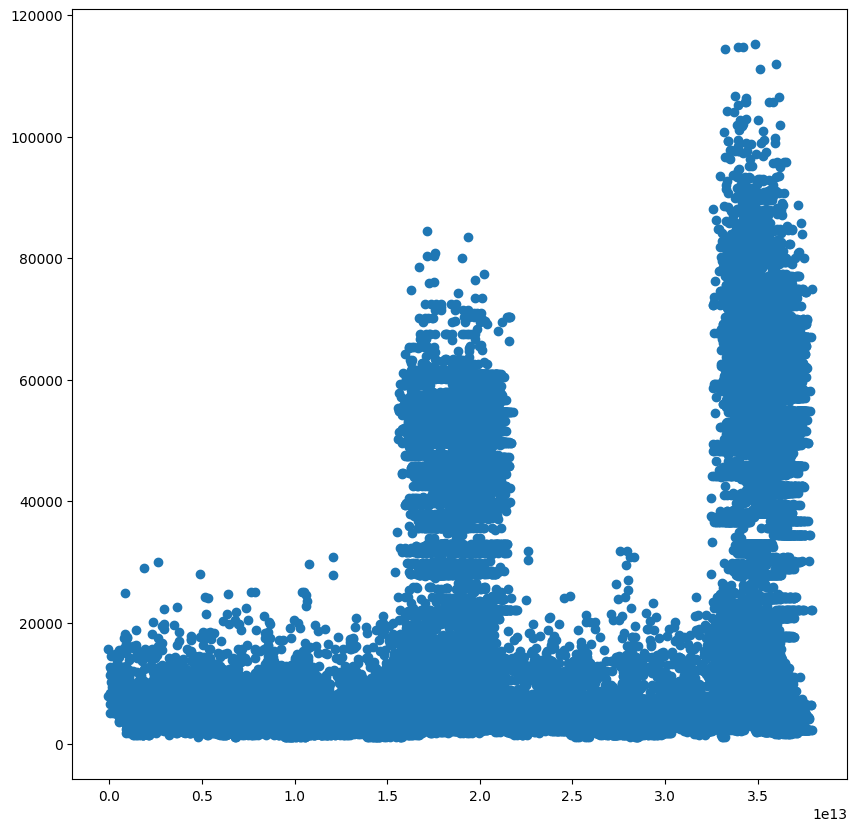

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(sgd_model.predict(X_test), y_test)
plt.plot([0,4], [0,4], '--k')

<b>

Obtaining a negative R2 score is indicative of poor performance by the model. It seems unexpected that the SGD Regressor, which was recommended as the top choice in the Scikit-Learn cheat sheet, would perform so poorly. However, according to some sources on the internet, there may be reasons why the model did not perform well.

* Data is not correctly preprocessed.

* Size and quality of the data are not enough.

* Hyperparameters.

Based on the good performance of the Decision Tree Regressor, we can conclude that the size and quality of the data is sufficient and that the preprocessing steps were effective. However, we can still experiment with adjusting the hyperparameters to potentially further improve the model's performance, although it may not result in significant changes.

<b> Another thing I can do is remove some unnecessary features

<AxesSubplot: >

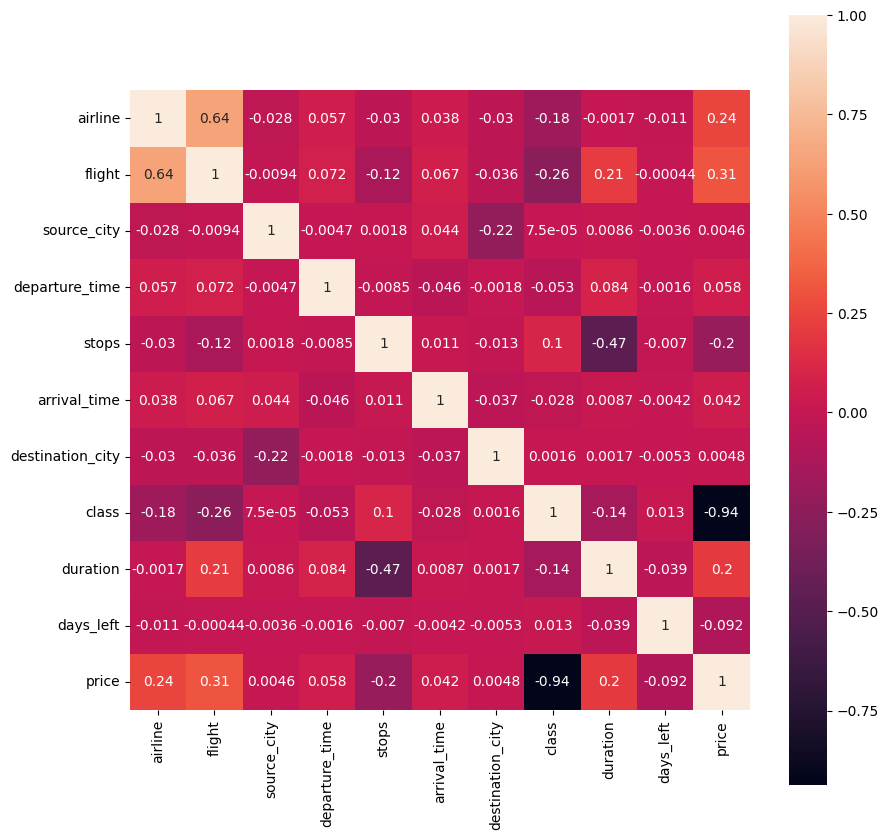

In [65]:
# Heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, square = True)

<b> 

Correlation between price and source_city, destination_city is very close to 0

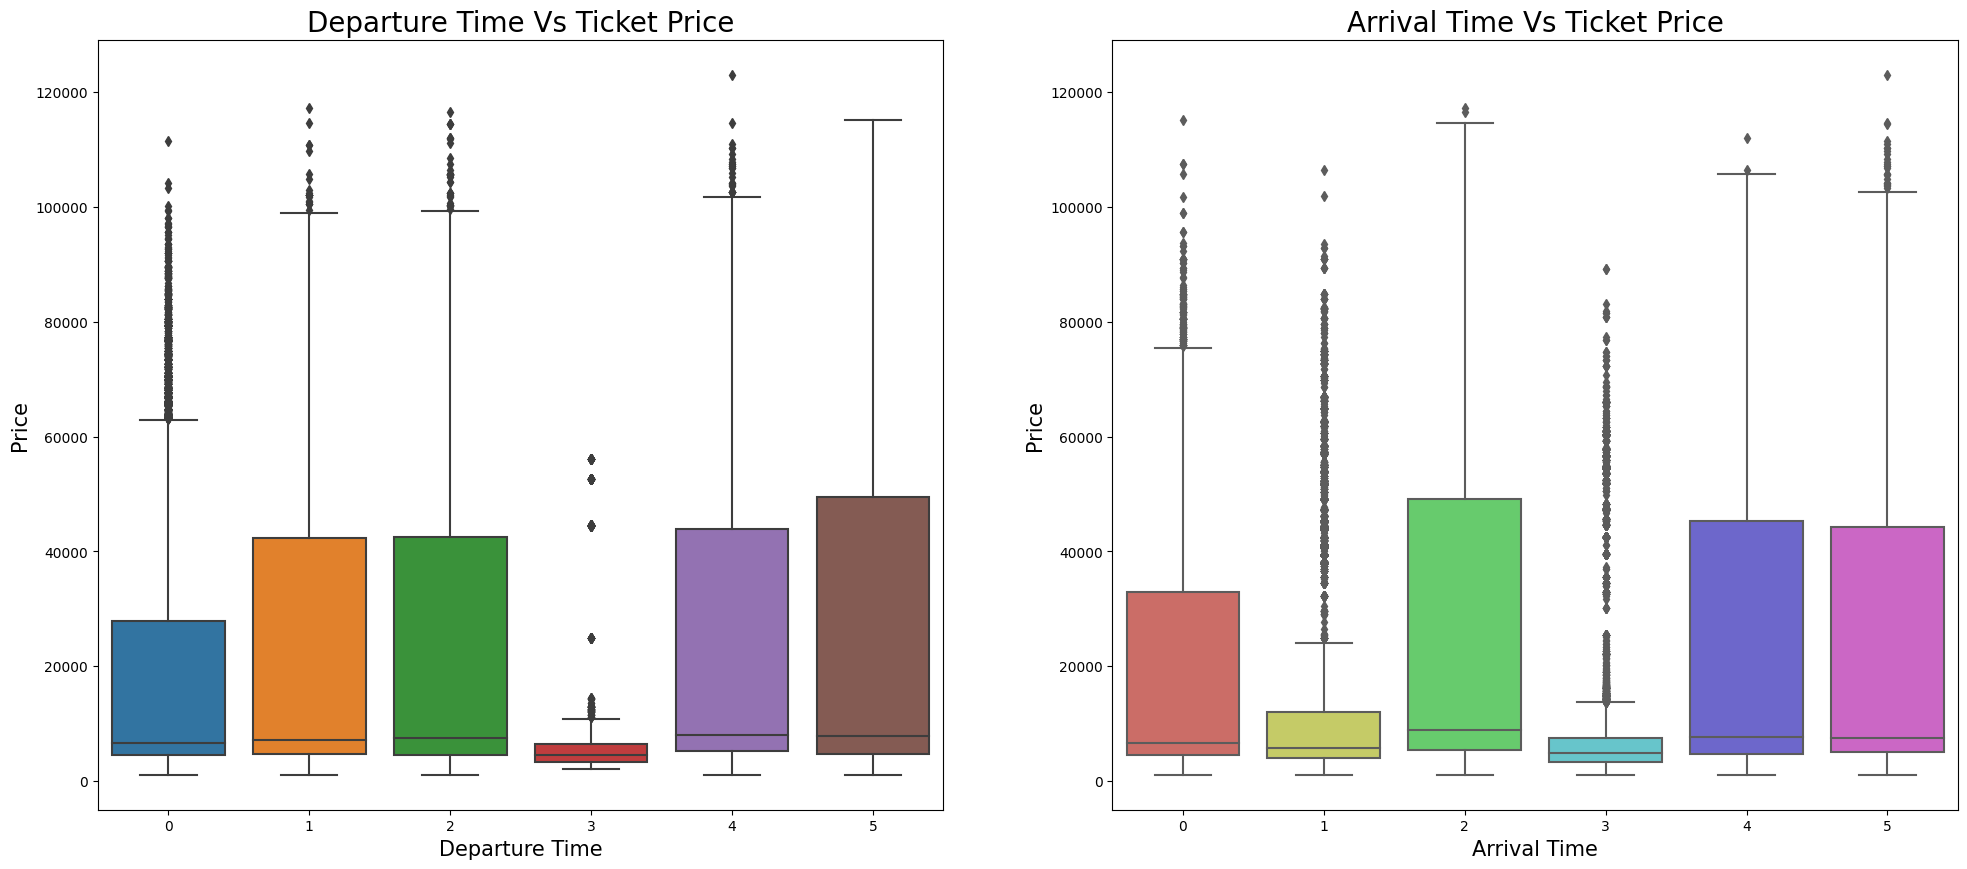

In [66]:
# let's see the the relation between Departure Time/arrival_time and Ticket Price 
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<b>

Because the correlation between these features and the price is also close to 0, I wanted to plot the relation to see if I can remove them from the dataset. 

* For Departure Time it is almost the same prices for all time labels expect number 3.

* Arrival time has two time lables that are different from the others. And Arrival time has a lot of outliers. 

So we can remove them both from the dataset

In [71]:
# Drop unnecessary columns
cols_to_drop = ['departure_time', 'arrival_time', 'source_city', 'destination_city']
new_df = df.drop(columns=cols_to_drop, axis=1)
new_df.head(10)

,airline,flight,stops,class,duration,days_left,price
0,4,1408,2,1,2.17,1,5953
1,4,1387,2,1,2.33,1,5953
2,0,1213,2,1,2.17,1,5956
3,5,1559,2,1,2.25,1,5955
4,5,1549,2,1,2.33,1,5955
5,5,1541,2,1,2.33,1,5955
6,5,1533,2,1,2.08,1,6060
7,5,1543,2,1,2.17,1,6060
8,2,1013,2,1,2.17,1,5954
9,2,1014,2,1,2.25,1,5954


In [74]:
# split data to 80% train data & 20% test data randomly (to build & evaluate Model)
X = new_df.drop('price', axis=1)
y = new_df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [76]:
X_train.head(5)

,airline,flight,stops,class,duration,days_left
148417,1,714,0,1,19.42,6
36879,3,110,1,1,7.00,13
274531,1,845,0,0,21.17,44
166397,5,1520,0,1,10.25,11
272722,5,1456,0,0,26.50,5


In [77]:
X_test.head(5)

,airline,flight,stops,class,duration,days_left
27131,1,748,0,1,19.75,40
266857,5,1442,0,0,9.83,42
141228,5,1454,0,1,10.50,41
288329,5,1479,0,0,14.50,14
97334,1,743,0,1,8.25,20


In [78]:
# Create an instance of the SGDRegressor with default hyperparameters
sgd_model_2 = SGDRegressor(random_state=42)

# Fit the model to the training data
sgd_model_2.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [79]:
# Calculate the R2 score
r2 = sgd_model_2.score(X_test, y_test)
print("R2-score: {}".format(r2))

R2-score: -5.1170808968251904e+17


<b> This does not work also. So, I can say that SGD-Regressor does not work on this dataset.